In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import statsmodels.api as sm



from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.api import qqplot
from statsmodels.api import add_constant
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import font_manager
from matplotlib import rc


# Check the Frequency of Variable
from collections import Counter
%matplotlib inline
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 


# 데이터 확인

In [2]:
df_users_raw = pd.read_csv('C:/Users/hanseokhyun/Desktop/빅데이터 프로젝트/cvs_users.csv', encoding="cp949")
df_users_raw.head()

,idUser,Gender,AgeGroup
0,U100001,남성,40대
1,U100002,여성,30대
2,U100003,남성,30대
3,U100004,남성,30대
4,U100005,여성,30대


In [3]:
df_users_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   idUser    1098 non-null   object
 1   Gender    1098 non-null   object
 2   AgeGroup  1098 non-null   object
dtypes: object(3)
memory usage: 25.9+ KB


In [4]:
df_users_raw.isnull().sum()

idUser      0
Gender      0
AgeGroup    0
dtype: int64

결측치는 존재하지 않는다.

In [5]:
df_users_raw.describe()

,idUser,Gender,AgeGroup
count,1098,1098,1098
unique,1098,2,6
top,U100001,남성,30대
freq,1,731,352


idUser에는 모두 다른 값이 들어있고 총 1098명의 User가 있다.

Gender는 남성 여성이 있고, 남성은 731명/ 여성은 368명이 있다.

Agegroup은 총 6개(10대, 20대, 30대, 40대, 50대, 60대이상)가 있고, 30대가 352명으로 가장 많다.

In [6]:
print(df_users_raw.groupby("Gender").size())
print()
print(df_users_raw.groupby("AgeGroup").size())
print()
print(df_users_raw.groupby(["Gender", "AgeGroup"]).size())

Gender
남성    731
여성    367
dtype: int64

AgeGroup
10대       69
20대      295
30대      352
40대      222
50대      126
60대이상     34
dtype: int64

Gender  AgeGroup
남성      10대          51
        20대         200
        30대         230
        40대         142
        50대          85
        60대이상        23
여성      10대          18
        20대          95
        30대         122
        40대          80
        50대          41
        60대이상        11
dtype: int64


# 그래프 그리기

# Users 데이터에 파생변수 생성: 방문 횟수, 구매 금액

In [7]:
df_sales_raw = pd.read_csv('C:/Users/hanseokhyun/Desktop/빅데이터 프로젝트/result.csv')

In [8]:
df_sales_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509300 entries, 0 to 509299
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   idUser           509300 non-null  object
 1   idPOS            509300 non-null  object
 2   SalesDT          509300 non-null  object
 3   SalesDate        509300 non-null  object
 4   ItemId           509300 non-null  object
 5   Gender           509300 non-null  object
 6   AgeGroup         509300 non-null  object
 7   ItemIdLarge      509300 non-null  object
 8   ItemNameLarge    509300 non-null  object
 9   ItemIdMiddle     509300 non-null  object
 10  ItemNameMiddle   509300 non-null  object
 11  ItemName         509300 non-null  object
 12  Item_CatORMaker  507224 non-null  object
 13  Price            509300 non-null  int64 
 14  ImageUrl         509300 non-null  object
dtypes: int64(1), object(14)
memory usage: 58.3+ MB


In [10]:
df_sales_raw.dropna(subset=['Item_CatORMaker'], inplace=True)

In [11]:
# 아이템에 해당하는 중분류와 가격이 일치 하지 않기에 이상치라 판단하고 삭제 처리 하였다.

In [12]:
df_sales_raw.reset_index(drop=True, inplace=True)

In [13]:
# 인데스 초기화

In [14]:
#사용자 정의 함수
#data: 사용할 데이터
#x: x축에 들어갈 열 이름
#hue: 구분하는 기준
#x_order: x축에 들어가는 데이터 순서
#hue_order: hue에 들어가는 데이터 순서

def print_barplot(data, x, hue=None, x_order=None, hue_order=None):
    sns.countplot(x=x, hue=hue, data=data, dodge=True, order=x_order, hue_order=hue_order)
    
    plt.title("Count Plot of Categorical Variables")
    plt.xlabel("{}".format(x))
    plt.ylabel("Frequency")

    # 범례 추가
    plt.legend()

    # 그래프 보여주기
    plt.show()

age_order = ['10대', '20대', '30대', '40대', '50대', '60대이상']
gender_order = ['남성', '여성']  # 성별 순서

In [15]:
# #df_users: df_users_raw에 파생변수 VisitCount(방문 횟수), TotalPrice(구매 금액) 추가한 데이터프레임

# visit_counts = df_sales_raw["idUser"].value_counts()
# df_users = df_users_raw.merge(visit_counts, left_on="idUser", right_index=True, how="left")
# df_users.rename(columns={"idUser_y": "VisitCount"}, inplace=True)
# df_users.rename(columns={"idUser_x": "idUser"}, inplace=True)

# total_prices = df_sales_raw.groupby("idUser")["Price"].sum()
# df_users["TotalPrice"] = df_users["idUser"].map(total_prices)

# display(df_users)

In [16]:
# 이거 방문 횟수가 아니라 구매 물품 수가 아닌지?

In [17]:
#### 수정 제안

In [25]:
visit_counts = df_sales_raw.groupby(["idUser", "SalesDT"]).size().groupby("idUser").size()
visit_counts

idUser
U100001      3
U100277    175
U100278    249
U100279    672
U100280     36
          ... 
U101094    466
U101095    230
U101096    248
U101097    291
U101098    272
Length: 823, dtype: int64

In [27]:
# 한번 방문시 찍히는 DT의 시간은 같으므로 unique함수를 통해 제거 하려 했는데 \
# user가 모두 2번이 찍히는 현상이 발생 하여 size함수를 두번 써서 id와 sales DT를 그룹화 하여 size를 두번 써서 방문 횟수를 나타나게 하였음

In [26]:
visit_counts = df_sales_raw.groupby(["idUser", "SalesDT"]).size().groupby("idUser").size().rename("VisitCount")
df_users = df_users_raw.merge(visit_counts, left_on="idUser", right_index=True, how="left")
df_users.rename(columns={"idUser_x": "idUser"}, inplace=True)
total_prices = df_sales_raw.groupby("idUser")["Price"].sum()
df_users["TotalPrice"] = df_users["idUser"].map(total_prices)
display(df_users)

,idUser,Gender,AgeGroup,VisitCount,TotalPrice
0,U100001,남성,40대,3.0,8250.0
1,U100002,여성,30대,NaN,NaN
2,U100003,남성,30대,NaN,NaN
3,U100004,남성,30대,NaN,NaN
4,U100005,여성,30대,NaN,NaN
...,...,...,...,...,...
1093,U101094,남성,10대,466.0,2865010.0
1094,U101095,남성,40대,230.0,1717250.0
1095,U101096,여성,30대,248.0,1767010.0
1096,U101097,남성,30대,291.0,2452490.0


In [28]:
df_users.dropna(subset=['VisitCount'], inplace=True)

In [29]:
# 아이디만 있고 방문횟수가 없는 사람들 삭제 해야겠지....?

In [30]:
df_users.reset_index(drop=True, inplace=True)

In [31]:
# 인데스를 초기화 해주어야 함

In [32]:
df_users.describe()

,VisitCount,TotalPrice
count,823.000000,8.230000e+02
mean,250.720535,1.917539e+06
std,185.476750,1.434000e+06
min,3.000000,8.250000e+03
25%,98.500000,7.070650e+05
50%,228.000000,1.730400e+06
75%,337.500000,2.508425e+06
max,717.000000,5.741100e+06


In [33]:
# users 이쌍치의 제거로 그래프를 다시 찍어봐야 함

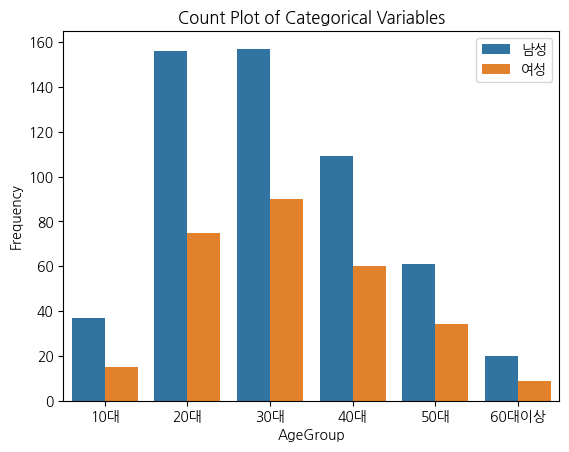

In [34]:
print_barplot(df_users, x="AgeGroup", hue="Gender", x_order=age_order, hue_order=gender_order)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


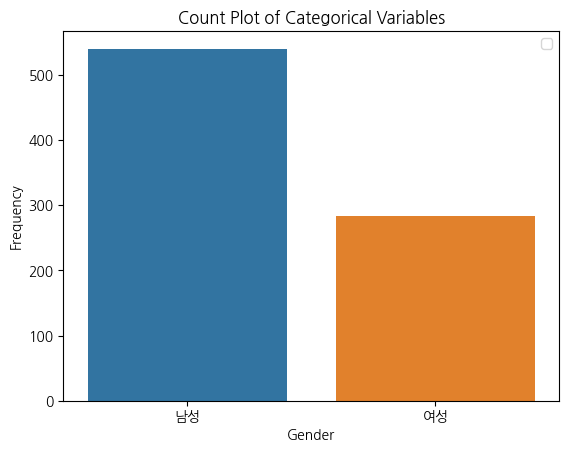

In [35]:
print_barplot(df_users, x = "Gender", x_order=gender_order)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


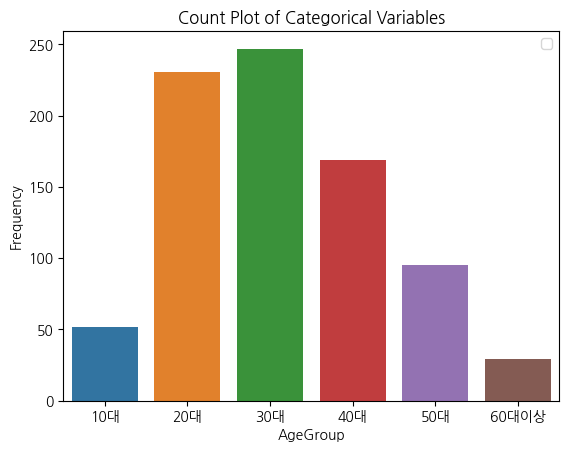

In [36]:
print_barplot(df_users, x = "AgeGroup", x_order=age_order)

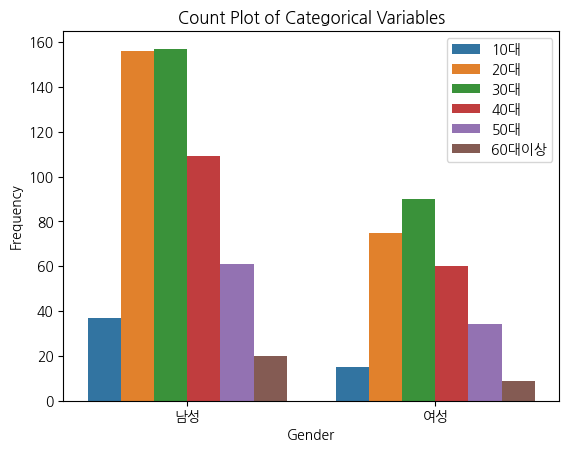

In [37]:
print_barplot(df_users, x="Gender", hue="AgeGroup", x_order=gender_order, hue_order=age_order)

In [43]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   idUser      823 non-null    object 
 1   Gender      823 non-null    object 
 2   AgeGroup    823 non-null    object 
 3   VisitCount  823 non-null    float64
 4   TotalPrice  823 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.3+ KB


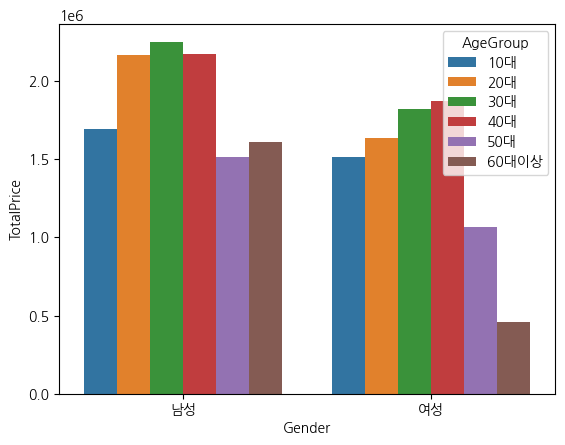

In [57]:
df_mean_price = df_users.groupby(["Gender", "AgeGroup"])["TotalPrice"].mean().reset_index()
# groupby를 이용해서 각 그룹의 지출 평균 금액을 계산하고 데이터프레임을 생성합니다. 이후에 reset_index()를 호출해서 인덱스를 초기화합니다.
print_barplot(df_mean_price, x="Gender", y="TotalPrice", hue="AgeGroup", x_order=gender_order, hue_order=age_order)
# 위에서 생성한 데이터프레임을 활용해서 그래프를 출력합니다.

In [49]:
# 평균 지출 금액인데 혹시나 이상치가 있을까봐 걱정됨 중앙

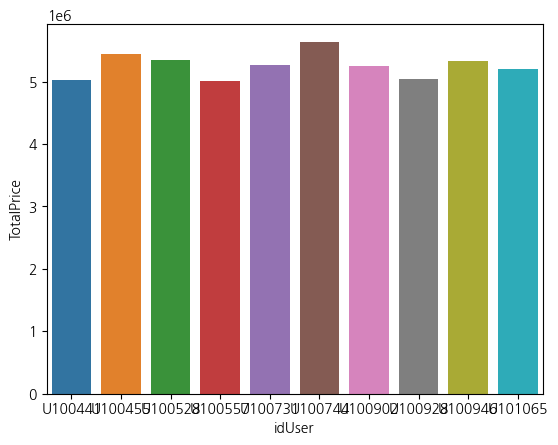

In [38]:
## 수정된거 
# 1 users count시 방문횡수가 0인 사람이 존재
# 2 이상치라 판단 하여 제거
# 3 makeORMaker 의 결측값이 존재 하는데 결측값들은 중분류 소분류 이름 모두가 제각각이며 URL로 확인이 불가능 하여 제거 하였다.
# 4 그래프는 위 과정을 거친 후에 그리는게 맞다고 판단 제거 한 뒤에 그래프를 그렸다.
# 5 

In [39]:
df_users.isnull().sum()

idUser        0
Gender        0
AgeGroup      0
VisitCount    0
TotalPrice    0
dtype: int64